# Introduction to Linear Algebra and Neural Networks

## Introduction

Goals
- What is a neural network?
- What is a cellular Automata
- What mathematics are needed to build a neural network?
- How can neural networks help us understand cognition?


## Be the Neuron

For this exercise you will need a sheet of graph paper and a **rule**. Begin with the top row of the graph paper. Your rule will specify how the color of a square of the graph paper depends  on the color of neighboring cells in the row immediately above.  Our rule depends on three cells only and is like the gentleman at the football match deciding whether to stand or sit when making the wave.  Each square in the grid of your graph paper decides whether to be blank or colored-in based on the three squares above it

In [2]:
%load_ext tikzmagic

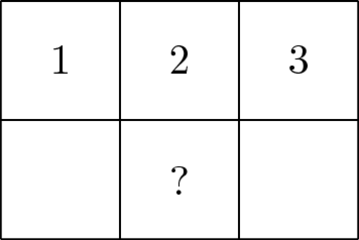

In [7]:
%%tikz
\draw[step=1cm] (-1,0) grid (2,2);
\draw (-0.5,1.5) node [] {1};
\draw (0.5,1.5) node [] {2};
\draw (1.5,1.5) node [] {3};
\draw (0.5,0.5) node [] {?};


## Rules

![Rule 60](introNN/CARule60.png)

<center>_Rule 60_</center>

![Rule 90](introNN/CARule90.png)

<center>_Rule 90_</center>

![Rule 110](introNN/CARule110.png)

<center>_Rule 110_</center>

![Rule 250](introNN/CARule250.png)

<center>_Rule 250_</center>


## Instructions

1. Color in the very center square of the very top row of the graph paper. 
2. Proceeding from left to right, color every square in the second row based on the rule you selected. In this row every cell will be left uncolored except for those near the center, because these rules all specify that a cell with three uncolored grids above remains uncolored. But how you treat the ones near the center will depend on the rule. For example, for rule 60, the cell immediately beneath the center, colored, square of row 1 will be colored, as will the one immediately to its right.
3. Repeat this process working down until you can clearly see the pattern, or you give up in despair.
Compare your results from using different rules.


## Food for Thought

 How many rules are there? This is an exercise in [combinatorics](https://en.wikipedia.org/wiki/Combinatorics). The field of mathematics for computing combinations. You know how many inputs there can be: there are three cells and each can be white or gray, $2\times2\times2 = 8$. But how many output patterns are there that each rule can be matched with?

### Comments

What this exercise illustrates (pun intended) is that remarkable global structure can emerge from the consistent application of simple rules. By analogy think of a neuron computing whether or not to spike based on the input it receives from a small set of neighbors. A spike becomes  a decision, like whether or not to color a grid of the graph paper.  The neuron does not need to know the global objective in order to do its job properly. The global structure takes care of itself.

 This example also emphasizes the components of many neural networks. Each grid square is a node. It took inputs, the colors  of the three squares above it, and it (or rather you) computed its output: its color. The connectivity was implicit in the structure we used. Each node (grid cell) was wired to the three  nodes, and only those three nodes, above it (for its input) and wired for output to the node directly beneath it and one to either side.  If we change the connections, we change the network. If we change the rule for coloring, we  change the network. There is nothing special or necessary about choosing to use three cells. In fact, von Neumann used a different, more complex architecture. Some mathematicians argue that such simple programs can give rise to all of our complex world.


### What's the Point?

 Local action can give rise to global properties

## Cellular Automata

1. [Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)
2. John Von Neumann
   **Automata and the Brain**
   
   Commentary by [Claude Shannon (pdf)](http://www.ams.org/bull/1958-64-03/S0002-9904-1958-10214-1/S0002-9904-1958-10214-1.pdf)

   [Copy](https://archive.org/details/TheComputerAndTheBrain) of the book: [The Computer and the Brain](https://archive.org)
3. Stephen Wolfram [thinks](http://www.wolframscience.com) automata explain everything



# What Math Underlies Neural Networks?


## Linear Algebra

The players:

1. Vectors
2. Matrices
3. Scalars
4. Addition
5. Multiplication (scalar and matrix)
6. Transposition
7. Inverse

In Class Exercise:

Using Numpy arrays (and what is an array?) construct two matrices and add them together. As I do below.

And then answer the following question (in code, that is by trying it out).

1. What are rules for being able to multiply two matrices?
2. Does A*B = B*A and what needs to be special about A and B  for this question to even make sense?

[Here](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.array-creation.html) are many different ways to create arrays.

In [9]:
import numpy as np
a = np.array([[1,2,3],[4,5,6],[5,6,7]])
b = a + 3
print(a*np.transpose(b))

[[ 4 14 24]
 [20 40 54]
 [30 54 70]]


## Notation

Vectors tend to be notated as _lower case_ letters, often in bold, such as $\mathbf{a}$. They are also occasionally represented with little arrows on top such as $\overrightarrow{\textbf{a}}$.

Matrices tend to be notated as _upper case_ letters, typically in bold, such as $\mathbf{M}$.

More Linear Algebra

1. What is a row vector and what is a column vector?
2. Which orientation is the more standard?
3. What is the size of a vector? There are a couple possible answers to this one.
4. What is an inner product? 

# Homework

Provide a program (or notebook) that computes the inner product of two vectors. First, by coding your own implementation, and second by using the built in numpy method. In your code verify that you get the same answer for the same inputs. And tell me why - in the notebook - that it is generally preferable to find and use built-in functions (or functions from established libraries) rather than coding your own.

In [19]:
a = np.array([1,2,3])
b = np.array([4,5,6])
def ip (v1,v2):
    try:
        return(sum([x*y for (x,y) in zip(v1,v2)]))
    except:
        print("Maybe your vectors are of incompatible sizes?")
def ipnumpy(v1,v2):
    return(np.dot(v1,v2))


In [21]:
print("ip(a,b) is equal to %d" % ip(a,b))
print("ipnumpy(a,b) is equal to %d" % ipnumpy(a,b))
print("and ip(a,b) == ipnumpy(a,b) is %s" % (ip(a,b) == ipnumpy(a,b)))

ip(a,b) is equal to 32
ipnumpy(a,b) is equal to 32
and ip(a,b) == ipnumpy(a,b) is True


# What is a Neural Network?

What is a Neural Network? It is a brain inspired computational approach in which "neurons" compute functions of their inputs and pass on a /weighted/ proportion to the next neuron in the chain.

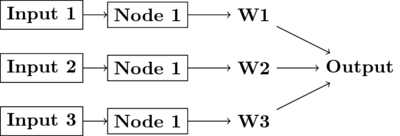

In [61]:
%%tikz
\draw node(i1)[rectangle,draw] {\textbf{Input 1}};
\draw node(i2)[below of=i1,rectangle,draw] {\textbf{Input 2}};
\draw node(i3)[below of=i2,rectangle,draw] {\textbf{Input 3}};
\draw node(n1)[right of= i1,rectangle,node distance = 2cm,draw] {\textbf{Node 1}};
\draw node(n2)[right of= i2,rectangle,node distance = 2cm,draw] {\textbf{Node 1}};
\draw node(n3)[right of= i3,rectangle,node distance = 2cm,draw] {\textbf{Node 1}};
\draw node(w1)[right of= n1,rectangle,node distance = 2cm] {\textbf{W1}};
\draw node(w2)[right of= n2,rectangle,node distance = 2cm] {\textbf{W2}};
\draw node(w3)[right of= n3,rectangle,node distance = 2cm] {\textbf{W3}};
\draw node(output)[right of = w2,rectangle,node distance = 2cm] {\textbf{Output}};
\draw [->] (i1) edge (n1) (n1) edge (w1) (w1) edge (output);
\draw [->] (i2) edge (n2) (n2) edge (w2) (w2) edge (output);
\draw [->] (i3) edge (n3) (n3) edge (w3) (w3) edge (output);

$I_1 \times w_{1,1} + I_2 \times w_{2,1} + I_3 \times w_{3,1} > \Theta$
then Output = 1.

The structure of the threshold unit illustrates the basic mechanics of many neural networks: Inputs are passed to the first layer, which in turn are passed to downstream units (only one shown here). A weighted sum (or possibly a function of the weighted sum) leads to an intermediate output that is then passed to the next layer of the network. In this case the weighted sum is fed into a threshold function that compares the value to a threshold, and passes on the value 1 if it is greater than the threshold and 0 otherwise. 

## Questions:

1. What does  the $\Theta$ represent and what is it equivalent to in a real neuron?
2. What, geometrically speaking, is a plane?
3. What is a hyperplane?
4. What is linearly separability and how does that relate to planes and hyperplanes?

## Examples 

### AND

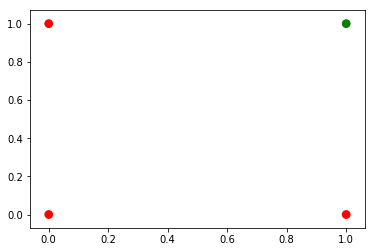

In [66]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as p
cs = ["#ff0000","#ff0000","#ff0000","#008000"]
p.scatter([0, 1, 0, 1],[0,0,1,1],color=cs,s = 60)

### XOR

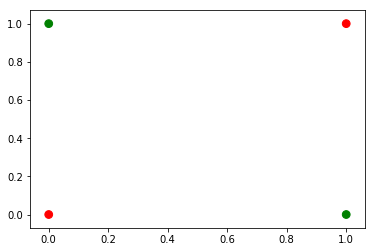

In [67]:
import matplotlib 
import matplotlib.pyplot as p
cs = ["#ff0000", "#008000",  "#008000", "#ff0000"]
p.scatter([0, 1, 0, 1],[0,0,1,1],color=cs,s = 60)

Nature Biotechnology volume 26, pages 195–197 (2008)

![Nature Biotechnology volume 26, pages 195–197 (2008)](https://media.nature.com/m685/nature-assets/nbt/journal/v26/n2/images/nbt1386-F1.gif)

## Boolean Logic

- George Boole, Author of the _Laws of Thought_
    1. Read the [book](https://archive.org/details/investigationofl00boolrich) on Archive.org
    2. Read about [George Boole](https://plato.stanford.edu/entries/boole/#LifWor).
    

*** First Order Logic - Truth Tables
    1. Or
       #+Name: Or
       #+Caption: Or
       | Pr. A | Pr. B | Or |
       |-------+-------+----|
       |     1 |     1 |  1 |
       |     0 |     0 |  0 |
       |     0 |     1 |  1 |
       |     1 |     0 |  1 |
    2. And
       #+Name: And
       #+Caption: And
       | Pr. A | Pr. B | And |
       |-------+-------+----|
       |     1 |     1 |  1 |
       |     0 |     0 |  0 |
       |     0 |     1 |  0 |
       |     1 |     0 |  0 |
    3. Nand
       #+Name: Nand
       #+Caption: Nand
       | Pr. A | Pr. B | NAND |
       |-------+-------+------|
       |     1 |     1 |    0 |
       |     0 |     0 |    1 |
       |     0 |     1 |    1 |
       |     1 |     0 |    1 |
**** Class Activity - Groups
     1. Create the truth table for the exlusive-or (aka XOR)
     2. Using only the above /functions/ show how you can get the XOR function from a particular chain of those three functions.
***** Answer :noexport:
      :Properties:
      :Visibility: folded
      :End:
      AND(NAND(INPUT),OR(INPUT))
*** Why Logic
**** Question:
     Why should the operations of truth tables and logic be considered relevant for models of human cognition or models of the nervous system?
***** Answer: :noexport:
      :Properties:
      :Visibility: folded
      :End:
      Possible answers. Not necessarily "right" answers.
      1. Human thought is fundamentally logical.
	 - General
           https://plato.stanford.edu/entries/cognitive-science/#ForLog
	 - Mental Models - Philip Johnson Laird
	   http://mentalmodels.princeton.edu/about/critics/
      2. Neuron firing can be treated as ones and zeros.
	 - McCullough and Pitts
	   http://link.springer.com/article/10.1007/BF02478259
	 - History of a search for logic in the nervous system
           http://muse.jhu.edu/article/46496

* Assignments
    1. Present me with a concise demonstration of the following, which could be a program or an excel spread sheet. This will require that you know what a vector and matrix are. Wikipedia is fine here, but you can use another source if you want. In fact, Wikipedia is more than you need. This python website http://www.python-course.eu/matrix_arithmetic.php provides a nice overview. 
       a. How to multiply two vectors together in the operation called a _dot product_. You can either do it with formulas in a spreadsheet or using a loop in some programming language, but you can't just use some special inbuilt function. I need to see enough to know that you understand what is actually taking place - then we will just use the built in functions as we progress.
       b. Show how this operation relates to the threshold neuron illustrated above in Figure 1.
       c. Demonstrate that matrix multiplication is "non-commutative."
